In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

## CARGAR ARCHIVOS DE LOS MOD.BLOQUES A DIFERENTES TAMAÑOS

In [ ]:
files.upload()
blo5=pd.read_csv('modbloques5.csv')
blo5=blo5.drop(['Unnamed: 0'], axis=1)

Saving modbloques5.csv to modbloques5.csv


In [ ]:
files.upload()
blo10=pd.read_csv('modbloques10.csv')
blo10=blo10.drop(['Unnamed: 0'], axis=1)

Saving modbloques10.csv to modbloques10.csv


In [ ]:
files.upload()
blo15=pd.read_csv('modbloques15.csv')
blo15=blo15.drop(['Unnamed: 0'], axis=1)

Saving modbloques15.csv to modbloques15.csv


In [ ]:
files.upload()
blo20=pd.read_csv('modbloques20.csv')
blo20=blo20.drop(['Unnamed: 0'], axis=1)

Saving modbloques20.csv to modbloques20.csv


### TONELAJE, CONTENIDO METALICO, LEY MEDIA Y VALOR EN DOLARES DE TODOS LOS BLOQUES CON LEY SUPERIOR AL CUT-OFF

In [ ]:
def consolidado(df,minimaley):
  minimaley=round(minimaley,3)
  df1= df[df['ley'] > minimaley]
  p=df1['ton'].sum()/1000000
  p=round(p,4)
  q=df1['cont_met'].sum()
  r=df1['cont_met'].sum()/df1['ton'].sum()*100
  r=round(r,3)
  s=df1['valor'].sum()/1000000
  s=round(s,4)

  return minimaley,p,q,r,s

## SENSIBILIDAD TONELAJE  - CUT OFF 

In [ ]:
def sensibilidad(tamaño,df):
  volbloq=int(tamaño**3)
  df['volumen']=volbloq
  df['ton']=df['volumen']*df['density']
  df['cont_met']=df['ton']*df['ley']*0.01
  df['valor']=df['cont_met']*0.9*5818

  maximaley=max(df['ley'])
  minimaley=min(df['ley'])
  cut_off=[]
  ton=[]
  con_meta=[]
  ley_media=[]
  valor_dol=[]
  while minimaley<maximaley:
    a,b,c,d,e=consolidado(df,minimaley) #FUNCIÓN SUPERIOR
    cut_off.append(a)
    ton.append(b)
    ley_media.append(d)
    valor_dol.append(e)
    minimaley=minimaley+0.01
  consolidadotodo={'cut-off':pd.Series(cut_off),'Toneladas(M)':pd.Series(ton),'Ley_media':pd.Series(ley_media),'Valor en dolares(M)':pd.Series(valor_dol)}
  consolidadotodo=pd.DataFrame(consolidadotodo)
  consolidadotodo.to_csv('consolidado.csv')
  files.download('consolidado.csv')
  return cut_off,ton,ley_media,valor_dol

In [ ]:
dat5A,dat5B,dat5C,dat5D=sensibilidad(5,blo5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dat10A,dat10B,dat10C,dat10D=sensibilidad(10,blo10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dat15A,dat15B,dat15C,dat15D=sensibilidad(15,blo15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dat20A,dat20B,dat20C,dat20D=sensibilidad(20,blo20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## GRÁFICA DE LA SENSIBILIDAD A DIFERENTES TAMAÑOS DE BLOQUES

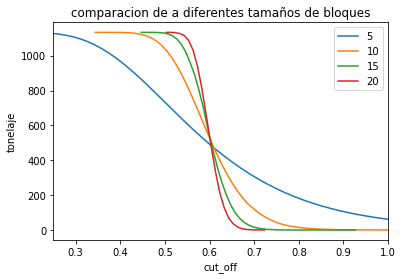

In [ ]:
plt.plot(dat5A,dat5B)
plt.plot(dat10A,dat10B)
plt.plot(dat15A,dat15B)
plt.plot(dat20A,dat20B)
plt.xlabel('cut_off')
plt.ylabel('tonelaje')
plt.title('comparacion de a diferentes tamaños de bloques')
plt.xlim(0.25,1)
plt.legend(('5','10','15','20'),prop = {'size': 10}, loc='upper right')
plt.show()